# Exploratory Data Analysis using offers data from Just join IT

[justjoin.it](https://justjoin.it) was founded in 2017 and is one of the fastest-growing IT job boards in Poland. 

I would like to answer some questions during the project:
- what skills are most wanted?
- what companies' field most job offers? 


We can begin our analysis by getting data. After looking into the network tab in inspect tool I found out that website has API for offers which can be available at [this url](https://justjoin.it/api/offers/)

In [69]:
import pandas as pd
import numpy as np
from collections import Counter
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
url = "https://justjoin.it/api/offers/"
r = requests.get(url)
r

<Response [200]>

As we can see a request to the API returned a response of 200 which means everything is alright. 

Let's check if we can load text from the response into a JSON object

In [71]:
offers = json.loads(r.text)

In [72]:
offers[0]

{'title': 'Junior Software Engineer',
 'street': 'Pawia 17/ High5ive 3',
 'city': 'Kraków',
 'country_code': 'PL',
 'address_text': 'Pawia 17/ High5ive 3, Kraków',
 'marker_icon': 'python',
 'workplace_type': 'partly_remote',
 'company_name': 'Qualtrics',
 'company_url': 'https://www.qualtrics.com/',
 'company_size': '5000+',
 'experience_level': 'junior',
 'latitude': '50.0714821',
 'longitude': '19.9458883',
 'published_at': '2023-03-24T21:00:11.191Z',
 'remote_interview': True,
 'open_to_hire_ukrainians': True,
 'id': 'qualtrics-junior-software-engineer-3555e024-1989-4965-968a-24efc9a528bb',
 'display_offer': True,
 'employment_types': [{'type': 'permanent', 'salary': None}],
 'company_logo_url': 'https://bucket.justjoin.it/offers/company_logos/thumb/a3e26c57695b95b640bf7e1fb25da86ec4adb565.png?1679478965',
 'skills': [{'name': 'Go', 'level': 3},
  {'name': 'Microservices', 'level': 3},
  {'name': 'Java', 'level': 3}],
 'remote': False,
 'multilocation': [{'city': 'Katowice',
   'sl

In [73]:
len(offers)

15469

There are 15.5 thousand offers on board. Let's load them into the pandas dataframe for further analysis

In [74]:
df = pd.DataFrame(offers)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15469 entries, 0 to 15468
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   title                    15469 non-null  object
 1   street                   15469 non-null  object
 2   city                     15469 non-null  object
 3   country_code             15464 non-null  object
 4   address_text             15469 non-null  object
 5   marker_icon              15469 non-null  object
 6   workplace_type           15469 non-null  object
 7   company_name             15469 non-null  object
 8   company_url              15469 non-null  object
 9   company_size             15469 non-null  object
 10  experience_level         15469 non-null  object
 11  latitude                 15469 non-null  object
 12  longitude                15469 non-null  object
 13  published_at             15469 non-null  object
 14  remote_interview         15469 non-nul

Unfortunately, there is a multilocation problem - some offers appear multiple times because candidates may work in a different location

for example we can view **Security Specialist** jobs in company **Allegro**:

In [76]:
df[(df["company_name"] == "Allegro") & (df["marker_icon"] == "security")]

,title,street,city,country_code,address_text,marker_icon,workplace_type,company_name,company_url,company_size,...,remote_interview,open_to_hire_ukrainians,id,display_offer,employment_types,company_logo_url,skills,remote,multilocation,way_of_apply
176,Security Specialist,Żelazna 51/53,Warszawa,PL,"Żelazna 51/53, Warszawa",security,partly_remote,Allegro,https://allegro.tech/,1001 - 5000,...,False,False,allegro-security-specialist,True,"[{'type': 'permanent', 'salary': None}]",https://bucket.justjoin.it/offers/company_logo...,"[{'name': 'Go', 'level': 3}, {'name': 'Python'...",False,"[{'city': 'Poznań', 'slug': 'allegro-security-...",redirect
4475,Security Specialist,Centrum,Gdańsk,PL,"Centrum, Gdańsk",security,partly_remote,Allegro,https://allegro.tech/,1001 - 5000,...,False,False,allegro-security-specialist-gdansk,False,"[{'type': 'permanent', 'salary': None}]",https://bucket.justjoin.it/offers/company_logo...,"[{'name': 'Go', 'level': 3}, {'name': 'Python'...",False,"[{'city': 'Gdańsk', 'street': 'Centrum', 'slug...",redirect
4476,Security Specialist,Aleja Kraśnicka 27,Lublin,PL,"Aleja Kraśnicka 27, Lublin",security,partly_remote,Allegro,https://allegro.tech/,1001 - 5000,...,False,False,allegro-security-specialist-lublin,False,"[{'type': 'permanent', 'salary': None}]",https://bucket.justjoin.it/offers/company_logo...,"[{'name': 'Go', 'level': 3}, {'name': 'Python'...",False,"[{'city': 'Lublin', 'street': 'Aleja Kraśnicka...",redirect
4477,Security Specialist,Zachodnia 70,Łódź,PL,"Zachodnia 70, Łódź",security,partly_remote,Allegro,https://allegro.tech/,1001 - 5000,...,False,False,allegro-security-specialist-lodz,False,"[{'type': 'permanent', 'salary': None}]",https://bucket.justjoin.it/offers/company_logo...,"[{'name': 'Go', 'level': 3}, {'name': 'Python'...",False,"[{'city': 'Łódź', 'street': 'Zachodnia 70', 's...",redirect
4483,Security Specialist,Swobodna 1,Wrocław,PL,"Swobodna 1, Wrocław",security,partly_remote,Allegro,https://allegro.tech/,1001 - 5000,...,False,False,allegro-security-specialist-wroclaw,False,"[{'type': 'permanent', 'salary': None}]",https://bucket.justjoin.it/offers/company_logo...,"[{'name': 'Go', 'level': 3}, {'name': 'Python'...",False,"[{'city': 'Wrocław', 'street': 'Swobodna 1', '...",redirect
4484,Security Specialist,Tadeusza Kościuszki 71,Toruń,PL,"Tadeusza Kościuszki 71, Toruń",security,partly_remote,Allegro,https://allegro.tech/,1001 - 5000,...,False,False,allegro-security-specialist-torun,False,"[{'type': 'permanent', 'salary': None}]",https://bucket.justjoin.it/offers/company_logo...,"[{'name': 'Go', 'level': 3}, {'name': 'Python'...",False,"[{'city': 'Toruń', 'street': 'Tadeusza Kościus...",redirect
4485,Security Specialist,Lubicz 23,Kraków,PL,"Lubicz 23, Kraków",security,partly_remote,Allegro,https://allegro.tech/,1001 - 5000,...,False,False,allegro-security-specialist-krakow,False,"[{'type': 'permanent', 'salary': None}]",https://bucket.justjoin.it/offers/company_logo...,"[{'name': 'Go', 'level': 3}, {'name': 'Python'...",False,"[{'city': 'Kraków', 'street': 'Lubicz 23', 'sl...",redirect
4486,Security Specialist,Wierzbięcice 1B,Poznań,PL,"Wierzbięcice 1B, Poznań",security,partly_remote,Allegro,https://allegro.tech/,1001 - 5000,...,False,False,allegro-security-specialist-poznan,False,"[{'type': 'permanent', 'salary': None}]",https://bucket.justjoin.it/offers/company_logo...,"[{'name': 'Go', 'level': 3}, {'name': 'Python'...",False,"[{'city': 'Poznań', 'street': 'Wierzbięcice 1B...",redirect
4487,Security Specialist,Żelazna 2,Katowice,PL,"Żelazna 2, Katowice",security,partly_remote,Allegro,https://allegro.tech/,1001 - 5000,...,False,False,allegro-security-specialist-katowice,False,"[{'type': 'permanent', 'salary': None}]",https://bucket.justjoin.it/offers/company_logo...,"[{'name': 'Go', 'level': 3}, {'name': 'Python'...",False,"[{'city': 'Katowice', 'street': 'Żelazna 2', '...",redirect


Now lets find it on website

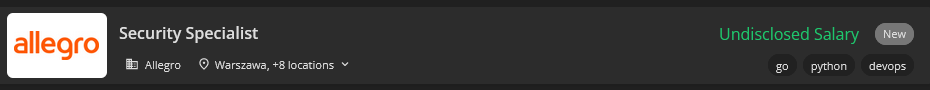

When we select this offer on-page we will see that the locations match these in our dataframe

so we can drop duplicated offers by a particular subset and keep just the first offer from a duplicated subset


I don't think that location is an important parameter because especially in IT jobs are often remote (even those that are not marked as remote), so I won't focus on which jobs location is kept. Also, locations are still kept in the multilocation column

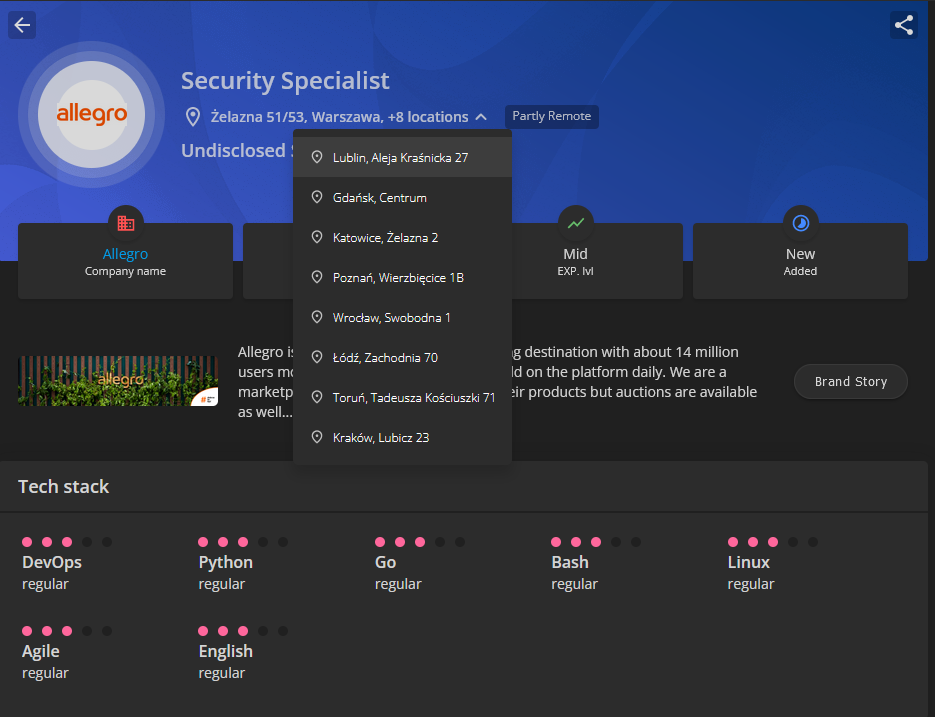

In [78]:
df = df.drop_duplicates(subset=["title", "marker_icon", "workplace_type", "company_name", "experience_level", "remote_interview" ,"published_at"], keep="first")

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6534 entries, 0 to 15459
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   title                    6534 non-null   object
 1   street                   6534 non-null   object
 2   city                     6534 non-null   object
 3   country_code             6531 non-null   object
 4   address_text             6534 non-null   object
 5   marker_icon              6534 non-null   object
 6   workplace_type           6534 non-null   object
 7   company_name             6534 non-null   object
 8   company_url              6534 non-null   object
 9   company_size             6534 non-null   object
 10  experience_level         6534 non-null   object
 11  latitude                 6534 non-null   object
 12  longitude                6534 non-null   object
 13  published_at             6534 non-null   object
 14  remote_interview         6534 non-null 

There are much less offers in our dataframe right now

After looking into dataframe I decided that a few columns need to be transformed

**company_size** column will get the first shot

In [80]:
df["company_size"]

0        5000+
1         + 30
2          180
3         1750
4        10-20
         ...  
15455    15-20
15456    15-20
15457    15-20
15458       50
15459    1400+
Name: company_size, Length: 6534, dtype: object

In [81]:
def fix_company_size(size):
    size = size.replace(" ", "")
    size = size.replace(",", "")
    if "-" in size: 
        if size == "-":
            return None
        try:
            first = int(size.split("-")[0])
            second = int(size.split("-")[1])
            return (first + second)//2
        except:
            return int(size.replace("-", "")) - 1
    if "+" in size:
        return int(size.replace("+", "")) + 1
    if "<" in size:
        return int(size.replace("<", "")) - 1
    if ">" in size:
        return int(size.replace(">", "")) + 1
    if "+-" in size:
        return int(size.replace("+-", ""))
    return size

In [82]:
df["fixed_size"] = df["company_size"].apply(fix_company_size)
df["fixed_size"] = pd.to_numeric(df["fixed_size"])

Way to transform column company_size into fixed_company_size:

| Example of company_size      | Action  | Example of fixed_company_size|
| ----------- | ----------- |-|
|200-220    | average of range       |210|
|-550| element one smaller | 549|
| 2700+   | element one bigger|2701|
|<100 | element one smaller | 99 |
|>10|element one bigger|11|
|+-50| element |50|



I am aware that this transform is far from being ideal, but given this dataset, I can't think of better solution



Next let's look at **employment_types** column

In [83]:
df["employment_types"]

0                  [{'type': 'permanent', 'salary': None}]
1        [{'type': 'b2b', 'salary': {'from': 5120, 'to'...
2        [{'type': 'b2b', 'salary': {'from': 25000, 'to...
3        [{'type': 'permanent', 'salary': {'from': 2579...
4        [{'type': 'permanent', 'salary': {'from': 1000...
                               ...                        
15455    [{'type': 'b2b', 'salary': {'from': 11000, 'to...
15456    [{'type': 'b2b', 'salary': {'from': 11000, 'to...
15457    [{'type': 'b2b', 'salary': {'from': 11000, 'to...
15458    [{'type': 'b2b', 'salary': {'from': 14000, 'to...
15459    [{'type': 'b2b', 'salary': {'from': 31920, 'to...
Name: employment_types, Length: 6534, dtype: object

In [84]:
df["employment_types"][2137]

[{'type': 'b2b', 'salary': {'from': 8000, 'to': 13000, 'currency': 'pln'}},
 {'type': 'permanent',
  'salary': {'from': 6700, 'to': 10900, 'currency': 'pln'}}]


employment_types contains information about the type of employment and salary, let's split it into 2 columns

In [85]:
def get_only_employment_types(row):
    return [el["type"] for el in row]

def get_only_salary(row):
    return [el["salary"] for el in row]

In [86]:
df["types_of_employment"] = df["employment_types"].apply(get_only_employment_types)
df["just_salary"] = df["employment_types"].apply(get_only_salary)

In [87]:
df["types_of_employment"]

0             [permanent]
1                   [b2b]
2        [b2b, permanent]
3             [permanent]
4             [permanent]
               ...       
15455               [b2b]
15456               [b2b]
15457               [b2b]
15458               [b2b]
15459               [b2b]
Name: types_of_employment, Length: 6534, dtype: object

We have 2 types of offers:
- with a possible range of salary
- without information about the salary

From offers with range, we can get a mean value of salary

In [88]:
def mean_salary(row):
    return [(el["from"] + el["to"])/2 for el in row if el is not None]

In [89]:
df["mean_salary"] = df["just_salary"].apply(mean_salary)

In [90]:
df["mean_salary"]

0                        []
1                  [5600.0]
2        [27500.0, 27500.0]
3                 [29012.5]
4                 [11250.0]
                ...        
15455             [12500.0]
15456             [12500.0]
15457             [12500.0]
15458             [19000.0]
15459             [33600.0]
Name: mean_salary, Length: 6534, dtype: object

In [91]:
plt.style.use("ggplot")

### Markets

Lets see how many offers are in different markets

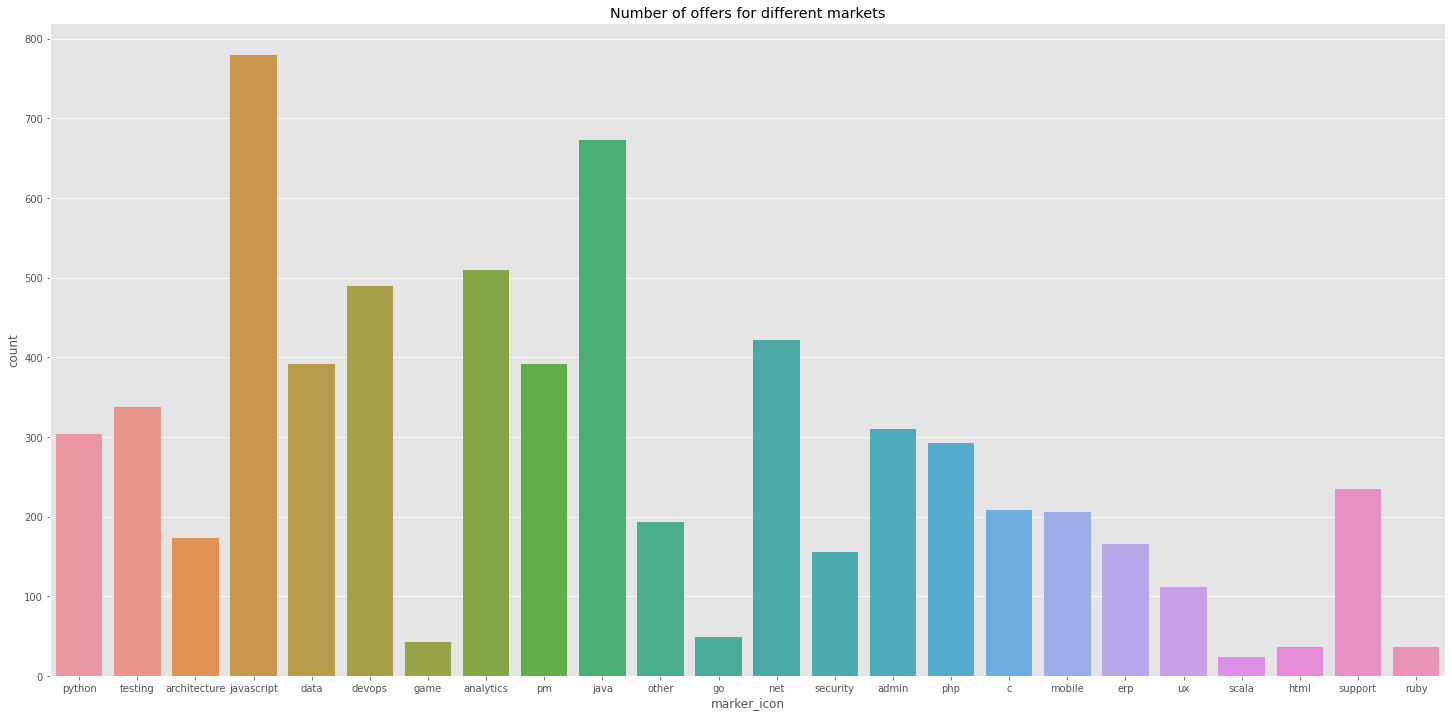

In [92]:
plt.figure(figsize=(25,12))
sns.countplot(data=df, x="marker_icon")
plt.title("Number of offers for different markets")
plt.show()

As we can see there are the most offers in **Javascript** market and the least in **scala** market


I am interested in data science jobs so let's highlight 2 linked markets:
- Python
- Data

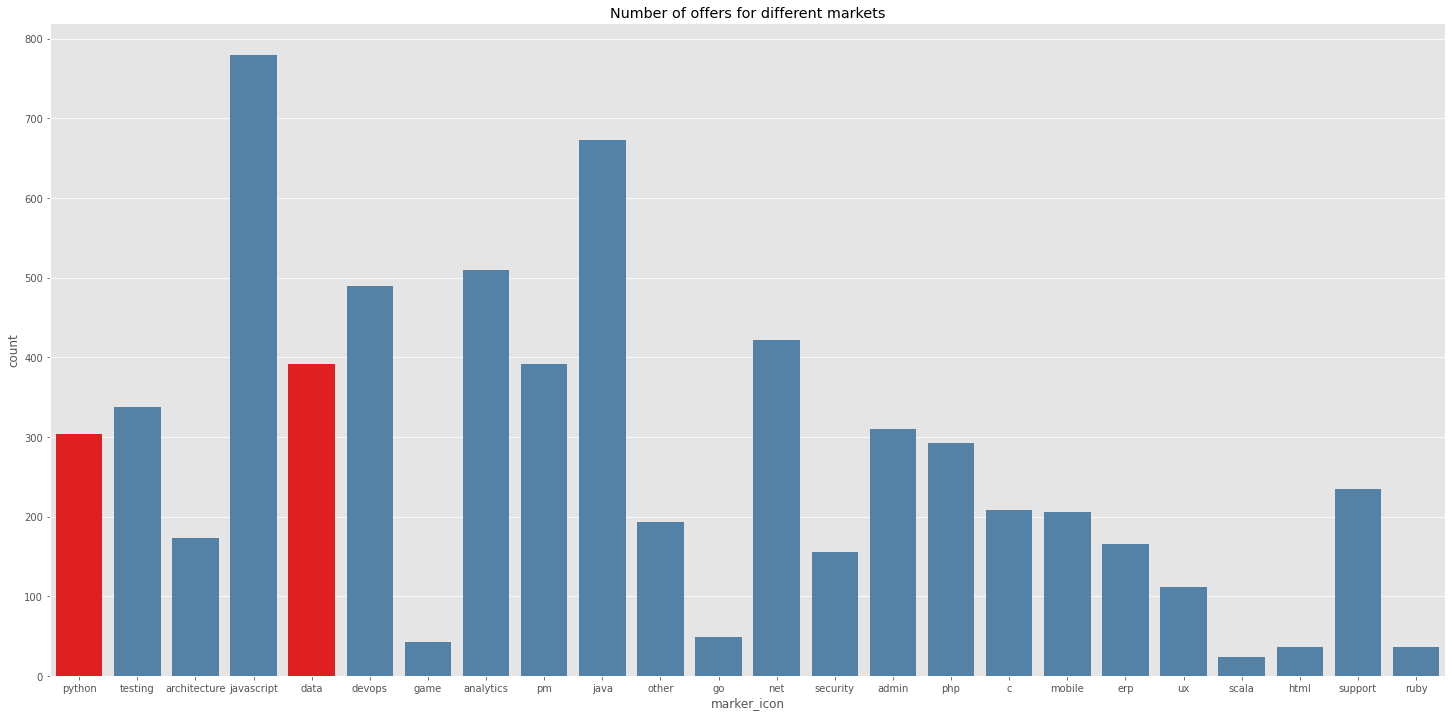

In [93]:
wanted = ["python", "data"]

clrs = ["steelblue" if el not in wanted else "red" for el in df["marker_icon"].unique()]

plt.figure(figsize=(25,12))
sns.countplot(data=df, x="marker_icon", palette=clrs)
plt.title("Number of offers for different markets")
plt.show()

There are more jobs in Data market than Python market
_____________________

### Companies

I would like to know which companies post most job offers on board

Lets view top 20 companies

In [94]:
df["company_name"].value_counts().head(20)

7N                                 71
Accenture                          56
emagine Polska                     55
Onwelo Sp. z o.o.                  52
Devire                             52
ITDS                               50
Procter & Gamble                   49
T-Mobile Polska S.A.               46
Atos                               45
Sigma IT Poland                    40
Software Interactive Sp. z o.o.    39
Ciklum                             38
Samsung R&D Institute Poland       36
Harman Connected Services          35
ING Poland Hubs                    33
Egnyte Poland                      32
DevsData LLC                       32
Unity Group                        31
Experis Manpower Group             31
Billennium                         31
Name: company_name, dtype: int64

Now lets check top 20 companies with most offers in my markets

In [95]:
df[df["marker_icon"].isin(["python", "data"])]["company_name"].value_counts().head(20)

Sigma IT Poland                 18
Accenture                       12
Affirm                          12
Idego                           11
Laurens Coster Sp. z o.o.       11
Splunk                          11
7N                              11
Raben                            9
Atos                             9
StratsLab                        8
Onwelo Sp. z o.o.                8
Reckitt                          8
PeakData                         8
Procter & Gamble                 8
hubQuest                         7
Sollers Consulting Sp. z.o.o     7
Samsung R&D Institute Poland     6
Snowflake                        6
emagine Polska                   6
Experis Manpower Group           6
Name: company_name, dtype: int64

There are some differences about these companies offers

_________________________

### Skills

IT offers many various jobs that require many different skills

I am gonna check which skills are most welcome by employers

In [96]:
def get_just_skills(row):
    return [el["name"] for el in row]

In [97]:
df["just_skills"] = df["skills"].apply(get_just_skills)

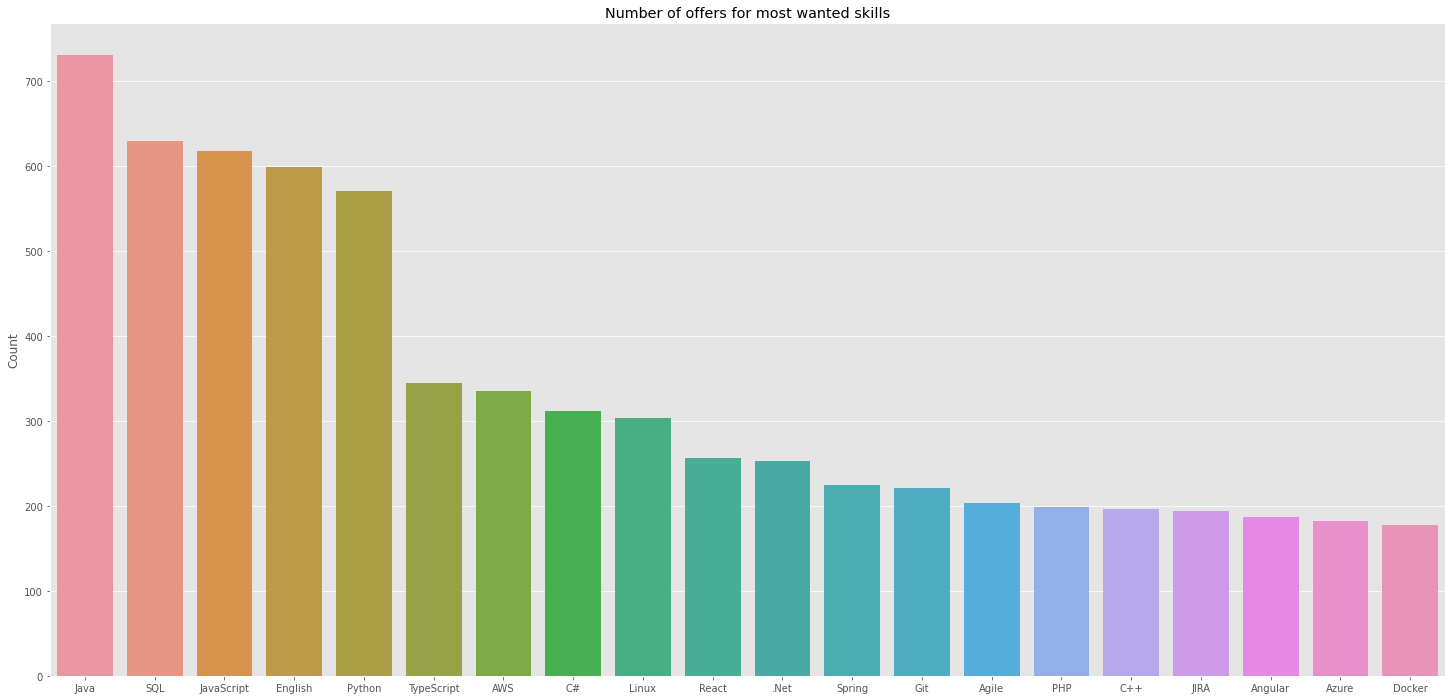

In [98]:
skills = []
for item in df["just_skills"].items():
    skills += item[1]

count = Counter(skills)
skills_df = pd.DataFrame.from_dict(count, orient='index')
skills_df.sort_values(by=0, ascending=False).head(20)

plt.figure(figsize=(25,12))
sns.barplot(data=skills_df.sort_values(by=0, ascending=False).head(20), x=skills_df.sort_values(by=0, ascending=False).head(20).index, y=0)
plt.title("Number of offers for most wanted skills")
plt.ylabel("Count")
plt.show()

Java is the most commonly wanted skill. What surprised me is third place. I knew that English is one of the crucial things for finding a job in it but I would not think that it will be listed with technical skills like:
- Python
- Linux 
- SQL 
- and so on...

It assured me in the opinion that implementing English in as many areas of life as possible is a good idea

Let's check most wanted skills for Data science jobs

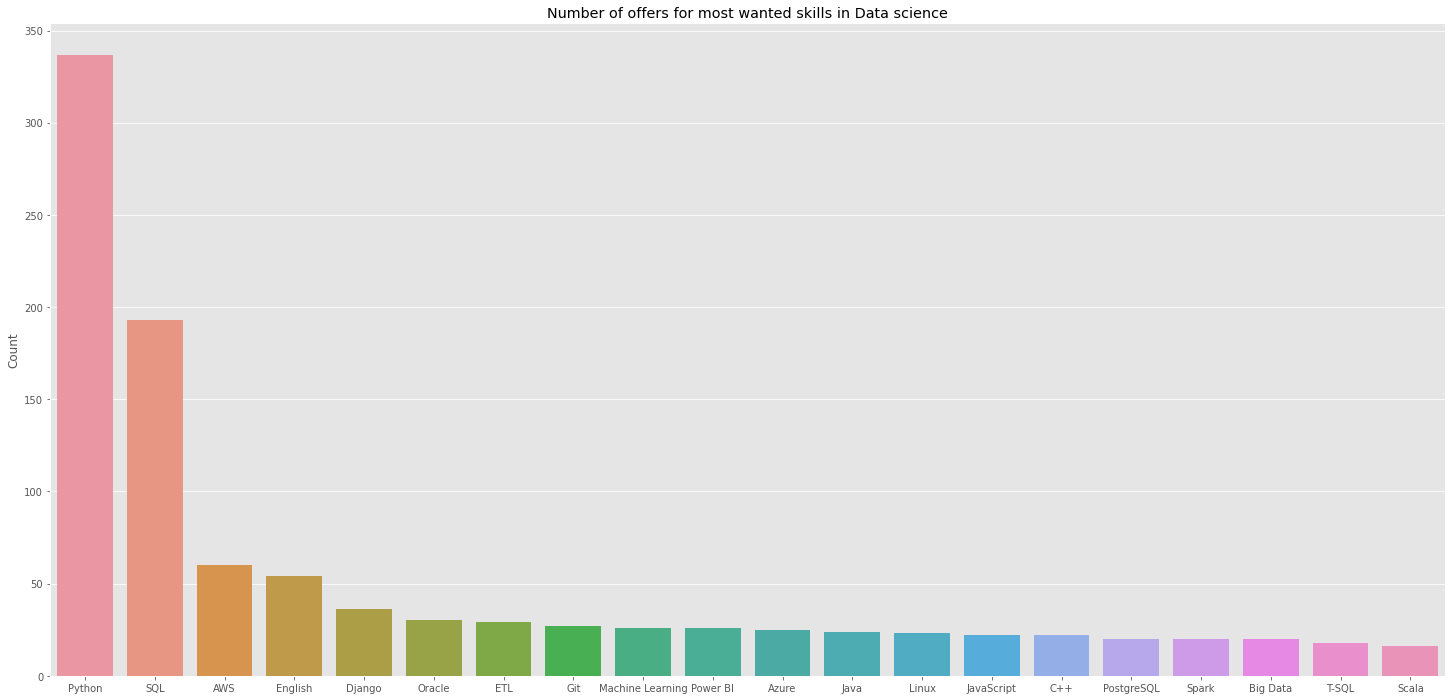

In [99]:
skills = []
for item in df[df["marker_icon"].isin(["python", "data"])]["just_skills"].items():
    skills += item[1]

count = Counter(skills)
skills_df_data = pd.DataFrame.from_dict(count, orient='index')

plt.figure(figsize=(25,12))
sns.barplot(data=skills_df_data.sort_values(by=0, ascending=False).head(20), x=skills_df_data.sort_values(by=0, ascending=False).head(20).index, y=0)
plt.title("Number of offers for most wanted skills in Data science")
plt.ylabel("Count")
plt.show()

Python and SQL are the most important skills for data science

An interesting fact is that Power BI is in 6 place, but another top BI tool - Tableau is not present in the top 20 skills for data science

I am gonna check if it is present in the skills Dataframe

In [100]:
"Tableau" in skills_df.index

True

Tableau is present among skills so we can compare its frequency with Power BI

In [101]:
tableau_power_bi = skills_df[skills_df.index.isin(["Tableau", "Power BI"])]
tableau_power_bi

,0
Power BI,75
Tableau,23


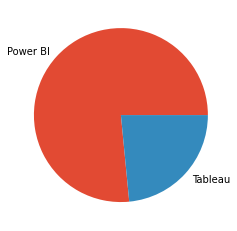

In [102]:
plt.pie(x=tableau_power_bi[0], labels=tableau_power_bi.index)
plt.show()

Also, the R language is not present in the top 20 so let's check if it is present at all

In [103]:
"R" in skills_df.index

True

In [104]:
python_r = skills_df[skills_df.index.isin(["Python", "R"])]
python_r

,0
R,15
Python,570


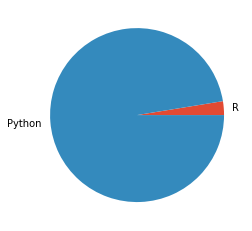

In [105]:
plt.pie(x=python_r[0], labels=python_r.index)
plt.show()

As we can see there are more offers with demand for Power BI than Tableau and much more for Python than R

As we can see there are more offers with demand for Power BI than Tableau and much more for Python than R


Another useful piece of information is that AWS is the most popular cloud technology. Let's compare it with other solutions like:
- Azure
- GCP
- Oracle

In [106]:
cloud = skills_df[skills_df.index.isin(["AWS", "GCP", "Azure", "Oracle Cloud"])]
cloud

,0
AWS,335
Azure,182
GCP,28
Oracle Cloud,1


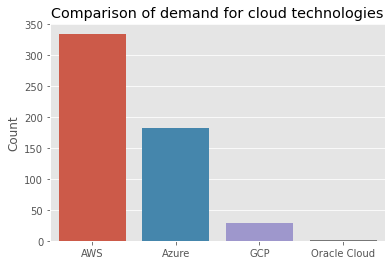

In [107]:
sns.barplot(data=cloud, x=cloud.index, y=cloud[0])
plt.title("Comparison of demand for cloud technologies")
plt.ylabel("Count")
plt.show()

I am a little bit surprised that there are not many jobs with GCP. I will check if this skill isn't placed in dataframe in other forms (for example Google Cloud Platform)

In [108]:
gcp_list = [i for i in list(skills_df.index) if i.lower().startswith("google c") or i.lower() == "gcp"]
gcp_list

['Google Cloud Platform', 'GCP', 'Google Cloud']

Yeah, it's written in other forms. Let's check other clouds

In [109]:
aws_list = [i for i in list(skills_df.index) if i.lower().startswith("amazon w") or i.lower().startswith("amazon aws") or i.lower() == "aws"]
aws_list

['AWS', 'Amazon Web Services', 'Amazon AWS']

In [110]:
oracle_list = [i for i in list(skills_df.index) if i.lower().startswith("oracle c")]
oracle_list

['Oracle Cloud']

In [111]:
azure_list = [i for i in list(skills_df.index) if i.lower().startswith("microsoft a") or i.lower() == "azure"]
azure_list

['Azure', 'Microsoft Azure', 'Microsoft Azure Cloud']

Now we can get values to make valid visualizations give the above info

In [112]:
cloud_dict = {
    "AWS":skills_df[skills_df.index.isin(aws_list)].sum().item(),
 "Azure":skills_df[skills_df.index.isin(azure_list)].sum().item(),
 "GCP":skills_df[skills_df.index.isin(gcp_list)].sum().item(),
 "Oracle":skills_df[skills_df.index.isin(oracle_list)].sum().item()
 }
cloud_dict

{'AWS': 365, 'Azure': 269, 'GCP': 56, 'Oracle': 1}

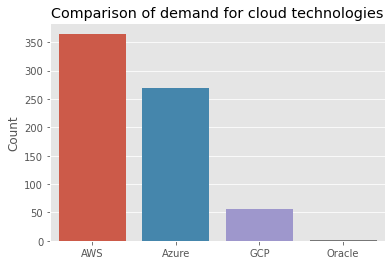

In [113]:
keys = list(cloud_dict.keys())
vals = [cloud_dict[k]for k in keys]
sns.barplot(x=keys, y=vals)
plt.title("Comparison of demand for cloud technologies")
plt.ylabel("Count")
plt.show()

It is valuable information that by justjoin.it we can have the same skills labeled in different ways. Let's check skills that start with "py" (just for fun)

In [114]:
py = [i for i in list(skills_df.index) if i.lower().startswith("py")]
py

['Python',
 'Python/SQL',
 'Python 3.x',
 'Python 3',
 'pytest',
 'PyTorch',
 'PySpark',
 'Python (preferred)',
 'PyQt',
 'Pydantic',
 'pyth',
 'Python/Django',
 'Python OR SQL',
 'Python/ Scala/ Java']

In [115]:
skills_df[skills_df.index.isin(py)]

,0
Python,570
Python/SQL,1
Python 3.x,6
Python 3,4
pytest,7
PyTorch,9
PySpark,10
Python (preferred),2
PyQt,2
Pydantic,3


_______________

### Salary

In [116]:
df["types_of_employment"].value_counts()

[b2b]                            2534
[permanent]                      2068
[b2b, permanent]                 1456
[permanent, b2b]                  372
[mandate_contract]                 63
[b2b, mandate_contract]            20
[mandate_contract, b2b]            10
[mandate_contract, permanent]       7
[permanent, mandate_contract]       4
Name: types_of_employment, dtype: int64

In [117]:
x = df[["id","employment_types"]].values.tolist()

First of all, I thought that getting a salary for each type of employment will be easier using 2 list columns (just_salary and types_of_employment). But after coming to a few weird solutions () I decided that I will use a primary column employment_type and look at result

In [118]:
to_df = []
for y in x:
    to_append = {"id": y[0]}
    to_append.update({el["type"]:(el["salary"]["from"] +  el["salary"]["to"])/2 for el in y[1] if el["salary"] != None})
    to_append.update({"currency":el["salary"]["currency"] for el in y[1] if el["salary"] != None})
    to_df.append(to_append)

In [119]:
salary_df = pd.DataFrame(to_df)
# salary_df.columns = ["id", "mandate_contract_salary", "currency", "b2b_salary", "permanent_salary"]
salary_df

,id,b2b,currency,permanent,mandate_contract
0,qualtrics-junior-software-engineer-3555e024-19...,NaN,NaN,NaN,NaN
1,skillspark-qa-automation-engineer,5600.0,eur,NaN,NaN
2,cloudferro-sp-z-o-o-architekt-systemow-informa...,27500.0,pln,27500.0,NaN
3,affirm-engineering-manager-comms-platform-wars...,NaN,pln,29012.5,NaN
4,lingventa-sp-z-o-o-frontend-developer,NaN,pln,11250.0,NaN
...,...,...,...,...,...
6529,laurens-coster-sp-z-o-o-data-engineering-team-...,12500.0,pln,NaN,NaN
6530,laurens-coster-sp-z-o-o-data-engineering-team-...,12500.0,pln,NaN,NaN
6531,laurens-coster-sp-z-o-o-data-engineering-team-...,12500.0,pln,NaN,NaN
6532,sdncenter-senior-ui-ux-designer-krakow,19000.0,pln,NaN,NaN


We should check the currencies of offers and convert other currencies into PLN

In [120]:
salary_df["currency"].value_counts()

pln    3990
eur     192
usd     123
gbp       5
chf       1
Name: currency, dtype: int64

In [121]:
# rates = {"pln":1, "eur": 4.75, "usd":4.41, "gbp": 5.37, "chf": 4.76}
conditions = [
    salary_df["currency"].isna(),
    salary_df["currency"] == "pln",
    salary_df["currency"] == "eur",
    salary_df["currency"] == "usd",
    salary_df["currency"] == "gbp",
    salary_df["currency"] == "chf",
]
values = [None, 1, 4.75, 4.41, 5.37, 4.76]

In [122]:
salary_df["rate"] = np.select(conditions, values)

In [123]:
salary_df["b2b_pln"] = salary_df["b2b"] * salary_df["rate"]
salary_df["permanent_pln"] = salary_df["permanent"] * salary_df["rate"]
salary_df["mandate_contract_pln"] = salary_df["mandate_contract"] * salary_df["rate"]

I will leave NaN values where salary is undisclosed (currency is NaN then). Where each type of employment is not present I will replace the NaN value with -1

In [124]:
salary_df[~salary_df["currency"].isna()] = salary_df[~salary_df["currency"].isna()].fillna(-1)

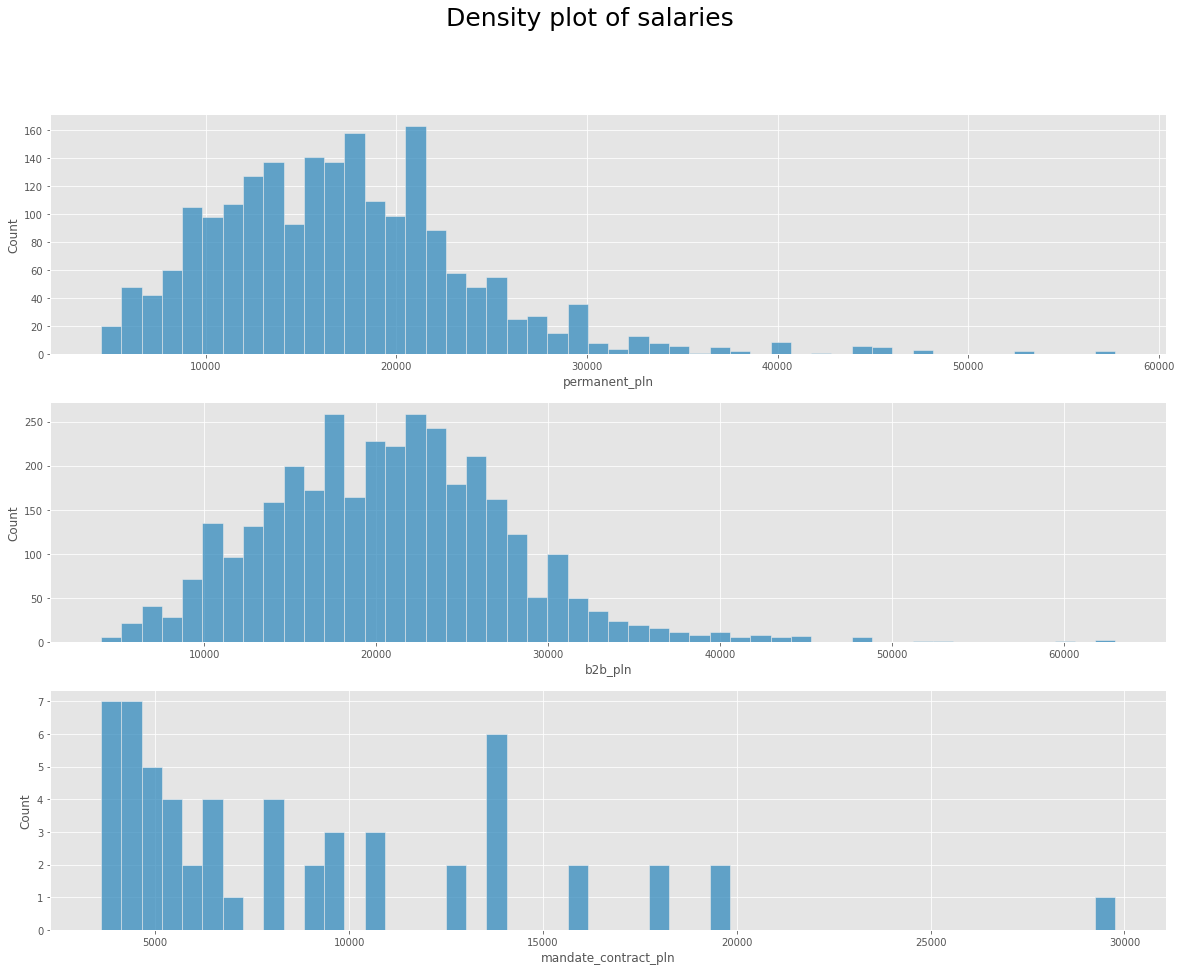

In [125]:
# plt.figure(figsize=(20,5))
fig, axes = plt.subplots(3,1, figsize=(20,15))
fig.suptitle('Density plot of salaries', fontsize=25)

axes = axes.ravel()
sns.histplot(salary_df[salary_df["permanent"] !=-1]["permanent_pln"], bins=50, ax=axes[0])
sns.histplot(salary_df[salary_df["b2b"] !=-1]["b2b_pln"], bins=50, ax=axes[1])
sns.histplot(salary_df[salary_df["mandate_contract"] !=-1]["mandate_contract_pln"], bins=50, ax=axes[2])
plt.show()

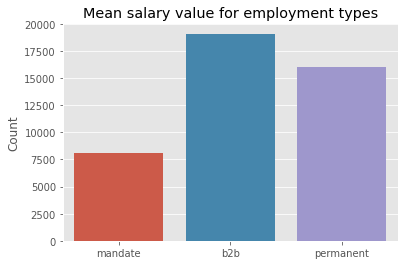

In [126]:
m = salary_df[salary_df["mandate_contract"] != -1]["mandate_contract"].mean()
b2b = salary_df[salary_df["b2b"] != -1]["b2b"].mean()
p = salary_df[salary_df["permanent"] != -1]["permanent"].mean()
salary = {"mandate": m, "b2b": b2b, "permanent":p}
sns.barplot(x=list(salary.keys()), y=list(salary.values()))
plt.title("Mean salary value for employment types")
plt.ylabel("Count")
plt.show()

In [127]:
merged = pd.merge(df[["id", "marker_icon", "experience_level", "just_skills"]], salary_df, on="id")

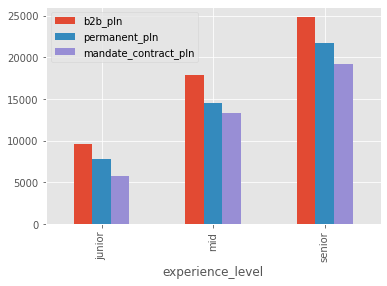

In [128]:
exp = merged.replace(-1, None).groupby(by=["experience_level"])[["b2b_pln", "permanent_pln", "mandate_contract_pln"]].mean()
exp.plot.bar()
plt.show()

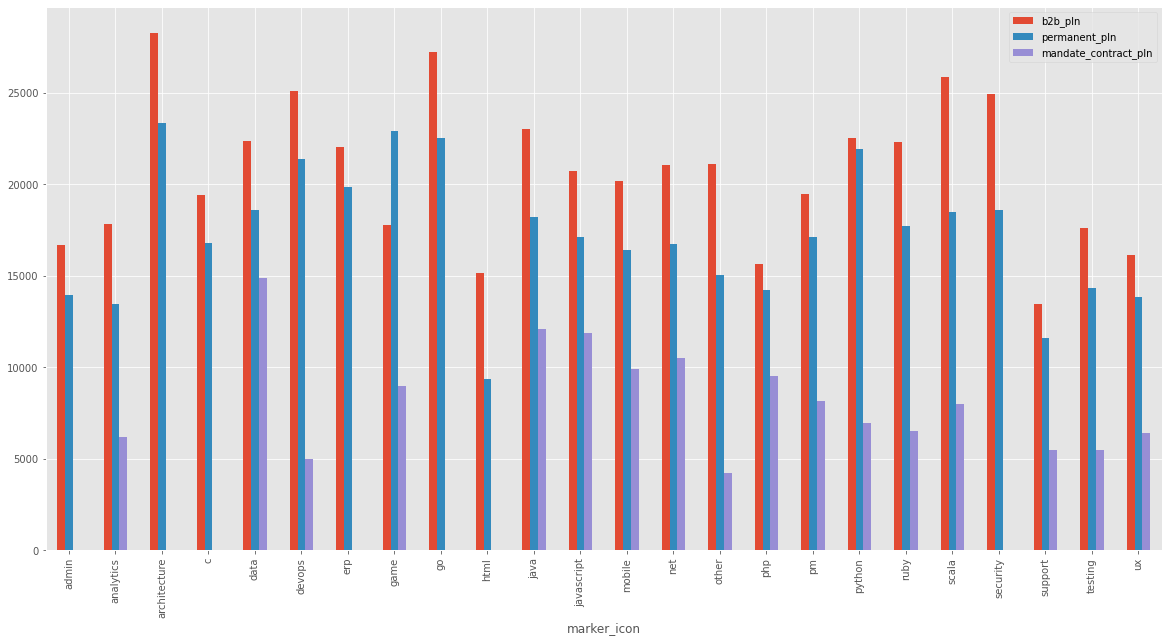

In [129]:
exp = merged.replace(-1, None).groupby(by=["marker_icon"])[["b2b_pln", "permanent_pln", "mandate_contract_pln"]].mean()
exp.plot.bar(figsize=(20,10))
plt.show()

Our plot of mean salary for marker_icon is not too readable, so I will just stick to b2b salary (there are the most offers for b2b)

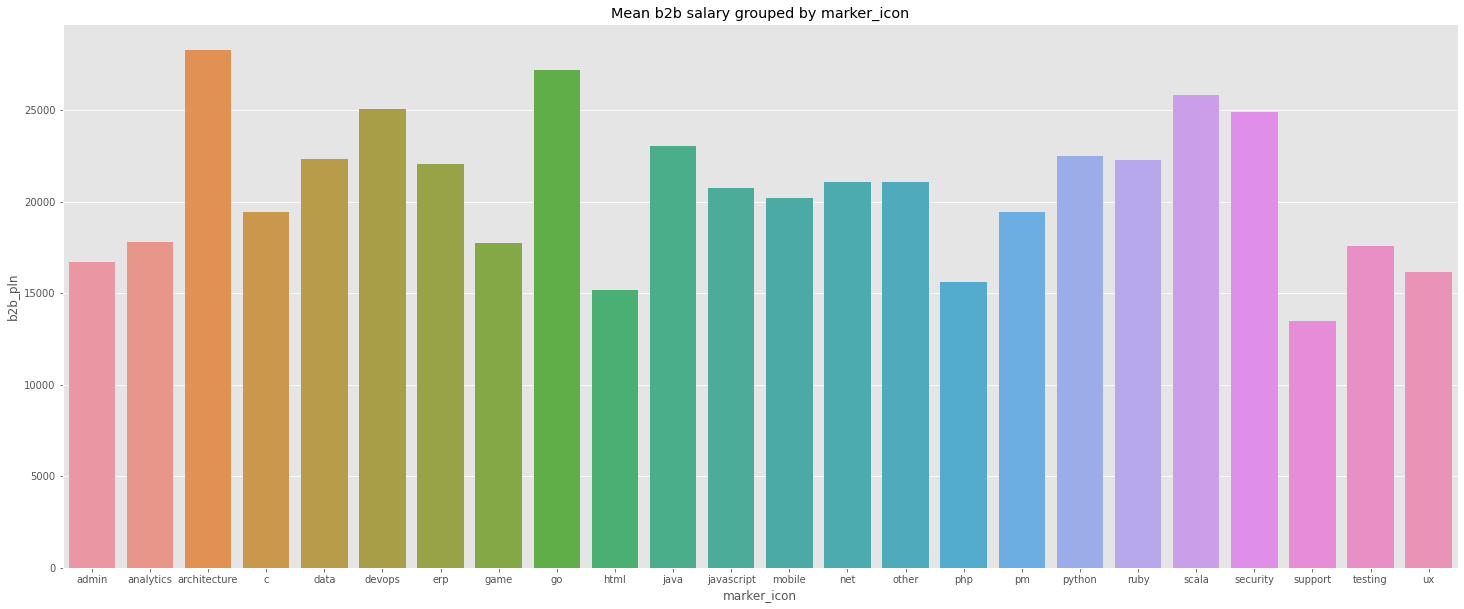

In [130]:
exp = merged.replace(-1, None).groupby(by=["marker_icon"])[["b2b_pln"]].mean()
plt.figure(figsize=(25, 10))
sns.barplot(data=exp, y="b2b_pln", x=exp.index)
plt.title("Mean b2b salary grouped by marker_icon")
plt.show()

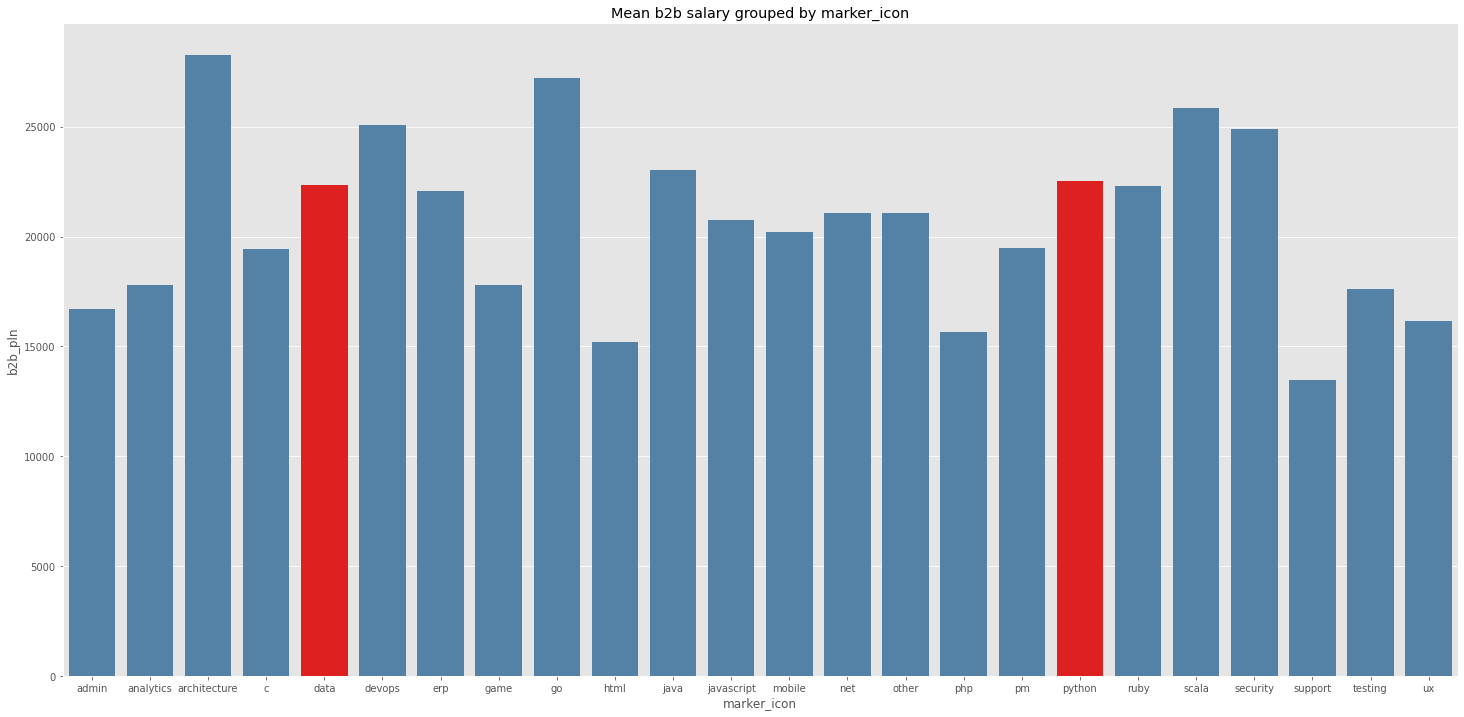

In [131]:
wanted = ["python", "data"]

clrs = ["steelblue" if el not in wanted else "red" for el in exp.index]

plt.figure(figsize=(25,12))
sns.barplot(data=exp, y="b2b_pln", x=exp.index, palette=clrs)
plt.title("Mean b2b salary grouped by marker_icon")
plt.show()

As we can see Python and Data are visually above average salary but lets make sure

In [132]:
exp["b2b_pln"].mean()

20662.517238692846

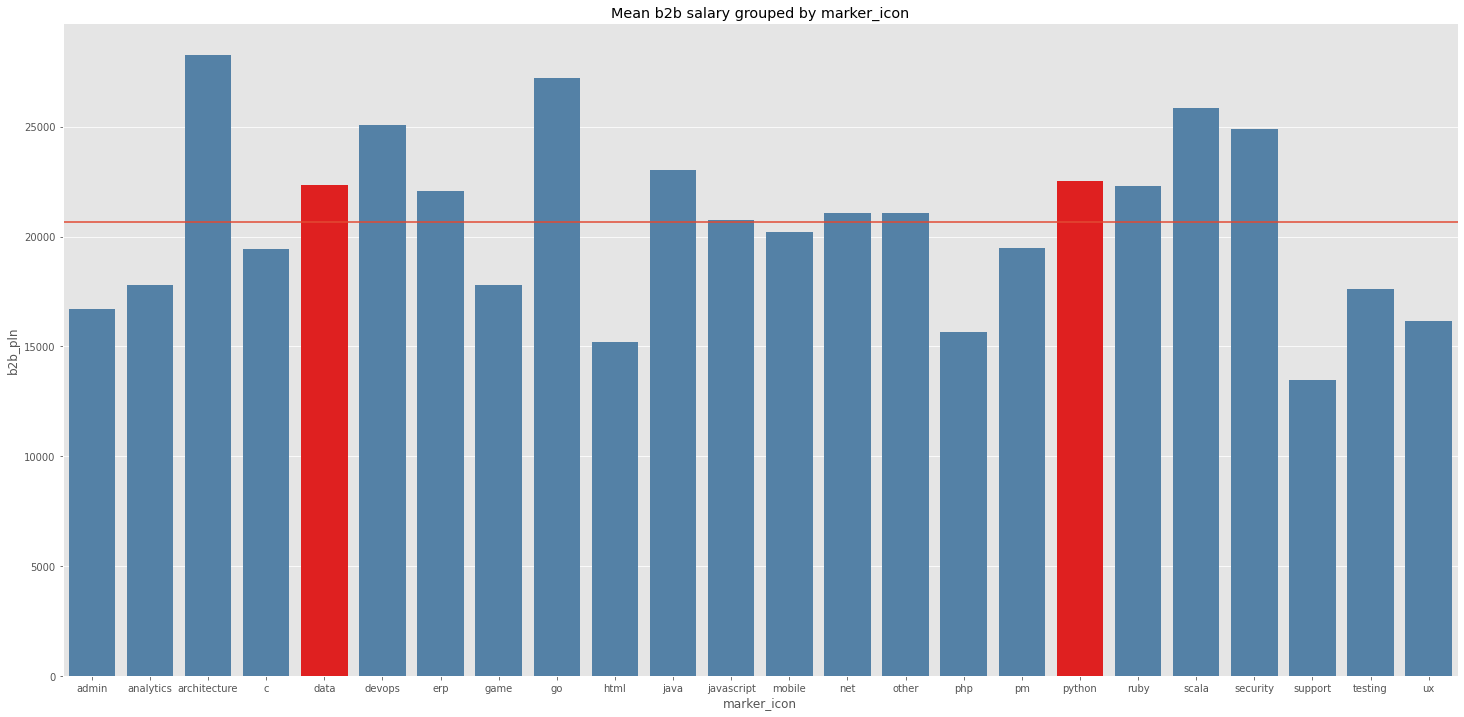

In [133]:
wanted = ["python", "data"]

mean_salary = exp["b2b_pln"].mean()
clrs = ["steelblue" if el not in wanted else "red" for el in exp.index]

plt.figure(figsize=(25,12))
sns.barplot(data=exp, y="b2b_pln", x=exp.index, palette=clrs).axhline(mean_salary)
plt.title("Mean b2b salary grouped by marker_icon")
plt.show()